In [1]:
import pandas as pd

df = pd.read_csv('ad_spend.csv')
df.head()

,Ad Spend ($),Season,Revenue ($)
0,463,Monsoon,440
1,158,Winter,297
2,328,Monsoon,214
3,322,Monsoon,48
4,726,Winter,1048


In [2]:
df.shape

(200, 3)

In [3]:
df.isna().sum()

Ad Spend ($)    0
Season          0
Revenue ($)     0
dtype: int64

In [5]:
g = df.groupby("Season")[['Ad Spend ($)', 'Revenue ($)']].mean()

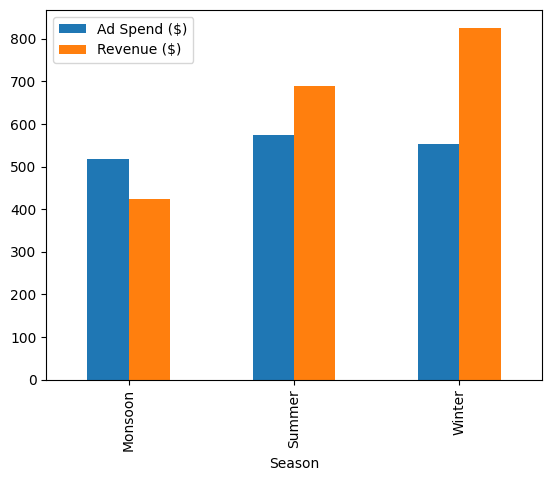

In [6]:
import matplotlib.pyplot as plt

g.plot(kind='bar')
plt.show()

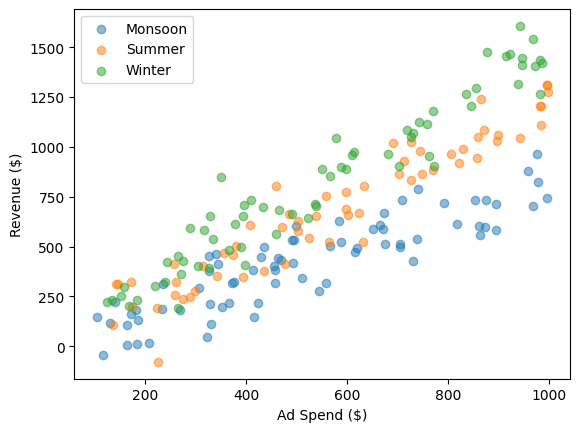

In [28]:
for season, subdf in df.groupby("Season"):
    plt.scatter(subdf['Ad Spend ($)'], subdf['Revenue ($)'], label=season, alpha=0.5)

plt.xlabel('Ad Spend ($)')
plt.ylabel('Revenue ($)')
plt.legend()
plt.show()

In [8]:
df_encoded = pd.get_dummies(df, columns=['Season'], drop_first=True)
df_encoded

,Ad Spend ($),Revenue ($),Season_Summer,Season_Winter
0,463,440,False,False
1,158,297,False,True
2,328,214,False,False
3,322,48,False,False
4,726,1048,False,True
...,...,...,...,...
195,407,609,True,False
196,182,183,False,False
197,184,10,False,False
198,380,504,True,False


In [22]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Revenue ($)', axis=1)
y = df_encoded['Revenue ($)']
print(X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

Index(['Ad Spend ($)', 'Season_Summer', 'Season_Winter'], dtype='object')


In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8882097000477289

In [12]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8972778553142061

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9149899654766234

In [14]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8860403895378113

In [15]:
y_pred = model.predict(X_test)

In [16]:
df_eval = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_eval.head()

,Actual,Predicted
59,605,626.058533
5,1125,1024.091553
20,699,612.109436
198,504,362.378204
52,1310,1143.377075


In [17]:
df_eval['Diff %'] = abs((df_eval['Predicted'] - df_eval['Actual']) / df_eval['Actual'] * 100)
df_eval.head()

,Actual,Predicted,Diff %
59,605,626.058533,3.480749
5,1125,1024.091553,8.969640
20,699,612.109436,12.430696
198,504,362.378204,28.099563
52,1310,1143.377075,12.719307


In [20]:
from sklearn.model_selection import GridSearchCV

model_params = {
    'linear_regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ["squared_error", "friedman_mse", "poisson"],
            'splitter': ['best', 'random']
        }
    },
    'gradient_boosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    },
    'xgboost': {
        'model': XGBRegressor(eval_metric='mlogloss'),
        'params': {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    }
}

scores = []

for key, val in model_params.items():
    clf = GridSearchCV(
        val['model'],
        val['params'],
        cv=10,
        return_train_score=False
    )
    clf.fit(X, y)
    scores.append({
        'model': key,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores, columns=["model", "best_score", "best_params"])

df

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "

,model,best_score,best_params
0,linear_regression,0.860262,{}
1,decision_tree,0.820287,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
2,gradient_boosting,0.876331,"{'learning_rate': 0.1, 'n_estimators': 50}"
3,xgboost,0.861953,"{'learning_rate': 0.1, 'n_estimators': 50}"


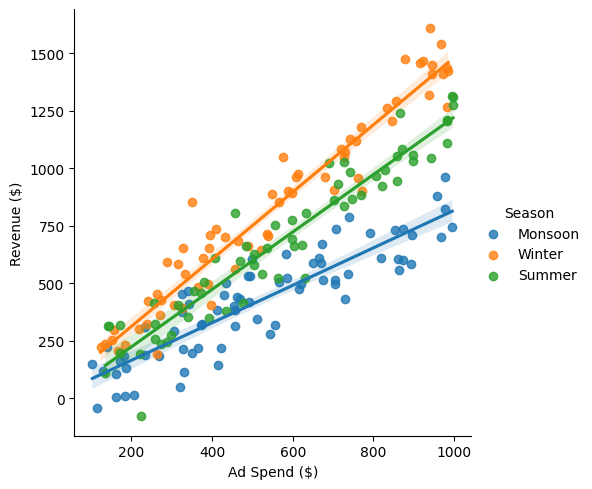

In [30]:
import seaborn as sns

import pandas as pd

df = pd.read_csv('ad_spend.csv')

sns.lmplot(x="Ad Spend ($)",y="Revenue ($)",data=df, hue="Season")